In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [8]:
#load the data
oecd_bli = pd.read_csv("data/oecd_bli_2015.csv", thousands=',')
oecd_bli

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.10,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.00,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.00,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.20,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.90,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3287,EST,Estonia,WL_TNOW,Time devoted to leisure and personal care,L,Value,WMN,Women,HOUR,Hours,0,units,NaN,NaN,14.43,NaN,NaN
3288,ISR,Israel,WL_TNOW,Time devoted to leisure and personal care,L,Value,WMN,Women,HOUR,Hours,0,units,NaN,NaN,14.24,E,Estimated value
3289,RUS,Russia,WL_TNOW,Time devoted to leisure and personal care,L,Value,WMN,Women,HOUR,Hours,0,units,NaN,NaN,14.75,E,Estimated value
3290,SVN,Slovenia,WL_TNOW,Time devoted to leisure and personal care,L,Value,WMN,Women,HOUR,Hours,0,units,NaN,NaN,14.12,NaN,NaN


In [12]:
gdp_per_capita =  pd.read_csv("data/gdp_per_capita.csv",thousands=',',delimiter='\t',encoding='latin1')
gdp_per_capita

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0
...,...,...,...,...,...,...,...
185,Vietnam,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",2088.344,2012.0
186,Yemen,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1302.940,2008.0
187,Zambia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1350.151,2010.0
188,Zimbabwe,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1064.350,2012.0


In [13]:
gdp_per_capita =  pd.read_csv("data/gdp_per_capita.csv",delimiter='\t',encoding='latin1')
gdp_per_capita

ParserError: Error tokenizing data. C error: Expected 7 fields in line 9, saw 9


In [7]:
gdp_per_capita =  pd.read_csv("data/gdp_per_capita.csv")
gdp_per_capita

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf4 in position 7801: invalid continuation byte

In [4]:
gdp_per_capita =  pd.read_csv("data/gdp_per_capita.csv",thousands=',',delimiter='\t', encoding='latin1', na_values="n/a")

In [6]:
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]


In [7]:
oecd_bli = oecd_bli.pivot(index="Country",columns="Indicator",values="Value")

In [9]:
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)

In [11]:
gdp_per_capita.set_index("Country", inplace=True)

In [12]:
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)

In [14]:
full_country_stats.sort_values(by="GDP per capita", inplace=True)

In [39]:
full_country_stats.iloc[[0, 1, 6, 8, 33, 34, 35]].index
#full_country_stats['GDP per capita'].iloc[[0, 1, 6, 8, 33, 34, 35]]

Index(['Brazil', 'Mexico', 'Chile', 'Czech Republic', 'Norway', 'Switzerland',
       'Luxembourg'],
      dtype='object', name='Country')

In [40]:
#full_country_stats.iloc[[0, 1, 6, 8, 33, 34, 35]]

In [41]:
#full_country_stats.columns

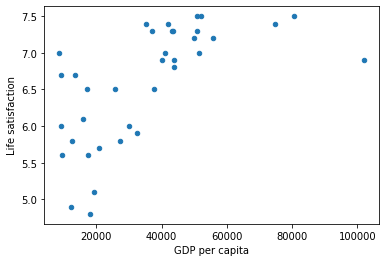

In [43]:
full_country_stats.plot.scatter(x = 'GDP per capita', y = 'Life satisfaction');

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
%matplotlib inline

In [46]:
full_country_stats['GDP per capita'].describe()

count        36.000000
mean      35392.481472
std       21641.175582
min        8669.998000
25%       17280.291750
50%       36194.113500
75%       45294.582500
max      101994.093000
Name: GDP per capita, dtype: float64

In [47]:
max_threshold = full_country_stats['GDP per capita'].quantile(0.95)
max_threshold

76285.4065

In [48]:
min_threshold = full_country_stats['GDP per capita'].quantile(0.05)
min_threshold

9043.505500000001

In [51]:
#full_country_stats[(full_country_stats['GDP per capita']>min_threshold) & (full_country_stats['GDP per capita']<max_threshold)]

In [50]:
full_country_stats = full_country_stats[(full_country_stats['GDP per capita']>min_threshold) & (full_country_stats['GDP per capita']<max_threshold)]

In [52]:
full_country_stats.shape

(32, 30)

In [55]:
full_country_stats['Life satisfaction'].describe()

count    32.000000
mean      6.528125
std       0.814480
min       4.800000
25%       5.875000
50%       6.750000
75%       7.300000
max       7.500000
Name: Life satisfaction, dtype: float64

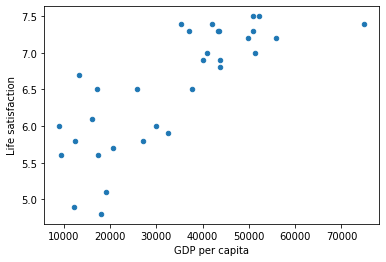

In [57]:
full_country_stats.plot.scatter(x = 'GDP per capita', y = 'Life satisfaction');

In [62]:
X = np.c_[full_country_stats['GDP per capita']]
y = np.c_[full_country_stats['Life satisfaction']]

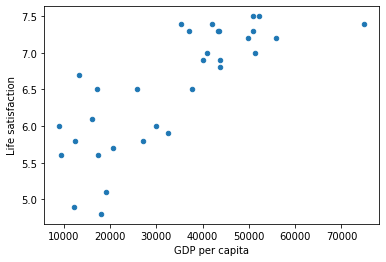

In [65]:
full_country_stats.plot.scatter(x = 'GDP per capita', y = 'Life satisfaction');
plt.show()

In [66]:
model = sklearn.linear_model.LinearRegression()

In [67]:
model.fit(X,y)

LinearRegression()

In [68]:
X_new = [[22587]]

In [69]:
print(model.predict(X_new))

[[6.09880866]]
